# Sentiment Analysis

This is a fork of https://github.com/adashofdata/nlp-in-python-tutorial.  Rather than using the transcripts of stand-up comedians, it uses the text of New Testament books of the Bible.

- Created Nov 2022
- Revised Nov 2024

In [1]:
# # Load the Drive helper and mount
# from google.colab import drive
# drive.mount('/content/drive')

import os
# base_dir = '/content/drive/MyDrive/ColabData/NLP_Demo/'
base_dir = '.'

try:
    os.mkdir(base_dir)
except FileExistsError:
    pass

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various book texts, both overall and throughout the book.

## Sentiment of Book

In [2]:
# We'll start by reading in the corpus, which preserves word order
%matplotlib inline
import pandas as pd
pd.set_option('max_colwidth', 150)

data = pd.read_pickle(os.path.join(base_dir, 'corpus.pkl'))
data

,book_text,num_chapters
Matthew,"1:1 This is the record of the genealogy of Jesus Christ, the son of David, the son of Abraham. 2 Abraham was the father of Isaac, Isaac the fathe...",28
Mark,"1:1 The beginning of the gospel of Jesus Christ, the Son of God. 2 As it is written in the prophet Isaiah, “Look, I am sending my messenger ahead ...",16
Luke,"1:1 Now many have undertaken to compile an account of the things that have been fulfilled among us, 2 like the accounts passed on to us by those ...",24
John,"1:1 In the beginning was the Word, and the Word was with God, and the Word was fully God. 2 The Word was with God in the beginning. 3 All things...",21
Acts,"1:1 I wrote the former account, Theophilus, about all that Jesus began to do and teach 2 until the day he was taken up to heaven, after he had gi...",28
Romans,"1:1 From Paul, a slave of Christ Jesus, called to be an apostle, set apart for the gospel of God. 2 This gospel he promised beforehand through hi...",16
1 Corinthians,"1:1 From Paul, called to be an apostle of Christ Jesus by the will of God, and Sosthenes, our brother, 2 to the church of God that is in Corinth,...",16
2 Corinthians,"1:1 From Paul, an apostle of Christ Jesus by the will of God, and Timothy our brother, to the church of God that is in Corinth, with all the saint...",13
Galatians,"1:1 From Paul, an apostle (not from men, nor by human agency, but by Jesus Christ and God the Father who raised him from the dead) 2 and all the ...",6
Ephesians,"1:1 From Paul, an apostle of Christ Jesus by the will of God, to the saints [in Ephesus], the faithful in Christ Jesus. 2 Grace and peace to you ...",6


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['book_text'].apply(pol)
data['subjectivity'] = data['book_text'].apply(sub)
data

,book_text,num_chapters,polarity,subjectivity
Matthew,"1:1 This is the record of the genealogy of Jesus Christ, the son of David, the son of Abraham. 2 Abraham was the father of Isaac, Isaac the fathe...",28,0.091678,0.498539
Mark,"1:1 The beginning of the gospel of Jesus Christ, the Son of God. 2 As it is written in the prophet Isaiah, “Look, I am sending my messenger ahead ...",16,0.089067,0.452338
Luke,"1:1 Now many have undertaken to compile an account of the things that have been fulfilled among us, 2 like the accounts passed on to us by those ...",24,0.112614,0.485596
John,"1:1 In the beginning was the Word, and the Word was with God, and the Word was fully God. 2 The Word was with God in the beginning. 3 All things...",21,0.127841,0.460800
Acts,"1:1 I wrote the former account, Theophilus, about all that Jesus began to do and teach 2 until the day he was taken up to heaven, after he had gi...",28,0.133863,0.483629
Romans,"1:1 From Paul, a slave of Christ Jesus, called to be an apostle, set apart for the gospel of God. 2 This gospel he promised beforehand through hi...",16,0.137725,0.535729
1 Corinthians,"1:1 From Paul, called to be an apostle of Christ Jesus by the will of God, and Sosthenes, our brother, 2 to the church of God that is in Corinth,...",16,0.132589,0.488816
2 Corinthians,"1:1 From Paul, an apostle of Christ Jesus by the will of God, and Timothy our brother, to the church of God that is in Corinth, with all the saint...",13,0.132779,0.517246
Galatians,"1:1 From Paul, an apostle (not from men, nor by human agency, but by Jesus Christ and God the Father who raised him from the dead) 2 and all the ...",6,0.112354,0.522140
Ephesians,"1:1 From Paul, an apostle of Christ Jesus by the will of God, to the saints [in Ephesus], the faithful in Christ Jesus. 2 Grace and peace to you ...",6,0.173475,0.555206


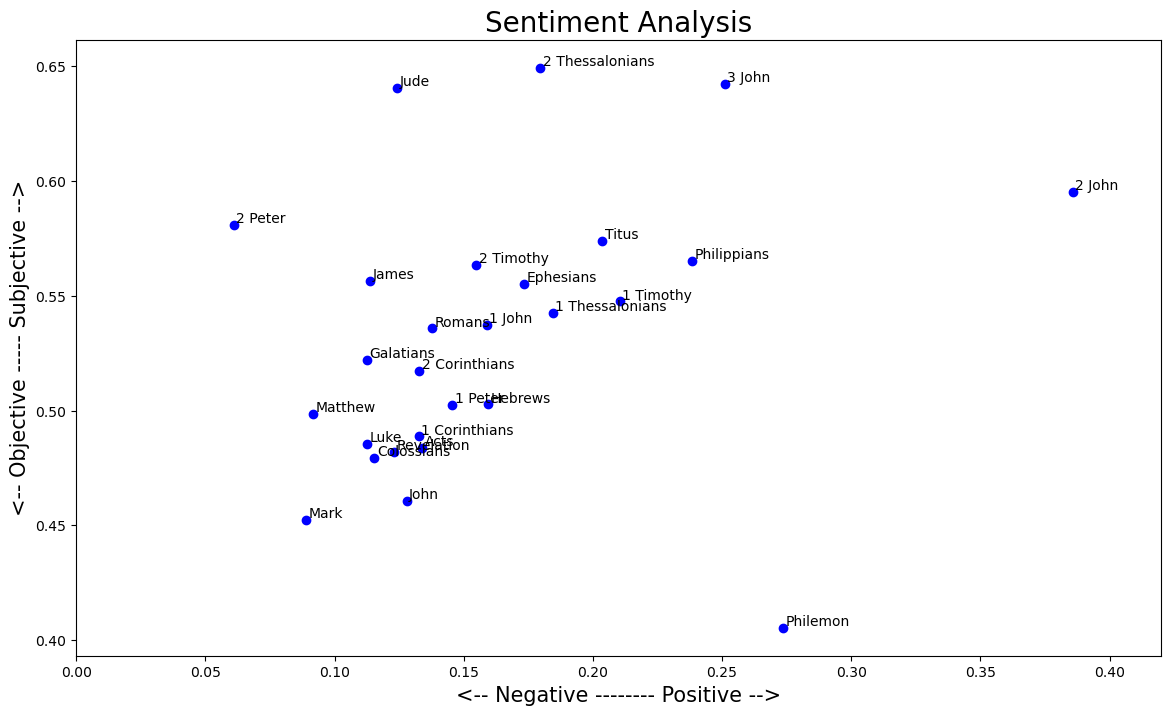

In [4]:
# Let's plot the results
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 8]

for index, book in enumerate(data.index):
    x = data.polarity.loc[book]
    y = data.subjectivity.loc[book]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, book, fontsize=10)
    plt.xlim(0.0, .42)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Objective ----- Subjective -->', fontsize=15)

plt.show()

**NOTE: (CPS330)** Notice that 2 Peter and 2 John have the extreme sentiment polarity values - take a look at the word clouds for these books produced in the previous notebook and see if they are consistent with this observation.

## Sentiment Changes Throughout Each Book

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each book.

In [5]:
# Split each book into chapters
import re

def split_into_chapters(text):
    return re.split(r'\s*[0-9]:', text.rstrip())

In [6]:
# Let's take a look at our data again
data

,book_text,num_chapters,polarity,subjectivity
Matthew,"1:1 This is the record of the genealogy of Jesus Christ, the son of David, the son of Abraham. 2 Abraham was the father of Isaac, Isaac the fathe...",28,0.091678,0.498539
Mark,"1:1 The beginning of the gospel of Jesus Christ, the Son of God. 2 As it is written in the prophet Isaiah, “Look, I am sending my messenger ahead ...",16,0.089067,0.452338
Luke,"1:1 Now many have undertaken to compile an account of the things that have been fulfilled among us, 2 like the accounts passed on to us by those ...",24,0.112614,0.485596
John,"1:1 In the beginning was the Word, and the Word was with God, and the Word was fully God. 2 The Word was with God in the beginning. 3 All things...",21,0.127841,0.460800
Acts,"1:1 I wrote the former account, Theophilus, about all that Jesus began to do and teach 2 until the day he was taken up to heaven, after he had gi...",28,0.133863,0.483629
Romans,"1:1 From Paul, a slave of Christ Jesus, called to be an apostle, set apart for the gospel of God. 2 This gospel he promised beforehand through hi...",16,0.137725,0.535729
1 Corinthians,"1:1 From Paul, called to be an apostle of Christ Jesus by the will of God, and Sosthenes, our brother, 2 to the church of God that is in Corinth,...",16,0.132589,0.488816
2 Corinthians,"1:1 From Paul, an apostle of Christ Jesus by the will of God, and Timothy our brother, to the church of God that is in Corinth, with all the saint...",13,0.132779,0.517246
Galatians,"1:1 From Paul, an apostle (not from men, nor by human agency, but by Jesus Christ and God the Father who raised him from the dead) 2 and all the ...",6,0.112354,0.522140
Ephesians,"1:1 From Paul, an apostle of Christ Jesus by the will of God, to the saints [in Ephesus], the faithful in Christ Jesus. 2 Grace and peace to you ...",6,0.173475,0.555206


In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for text in data.book_text:
    split = split_into_chapters(text)[1:]
    list_pieces.append(split)

#list_pieces

In [8]:
# The list has one element for each book, each of these is a list of chapters
len(list_pieces)

27

In [9]:
# Each book has 1 or more chapters (Matthew has 28 chapters)
len(list_pieces[0])

28

In [10]:
# Calculate the polarity for each piece of text

polarity_in_book = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_in_book.append(polarity_piece)

# Show the polarity values in the first book
polarity_in_book[0]

[-0.1388888888888889,
 0.19673202614379082,
 0.31385836385836374,
 0.12503427128427128,
 0.15071294054344903,
 0.07107142857142858,
 0.11698412698412697,
 0.015372555272108844,
 0.005512318563789148,
 0.0062572590011614315,
 0.1851053639846743,
 0.06852346999405828,
 0.19989987336926113,
 -0.06219824735449736,
 -0.08850373482726424,
 0.09565972222222223,
 0.054407407407407425,
 0.07714533730158732,
 0.1498793436293436,
 0.11374123292727946,
 0.007650560224089642,
 0.1463058688387636,
 0.16046593468468467,
 0.12147716229348879,
 0.07894151475694446,
 0.04803690753690754,
 0.15867715374294325,
 0.02224702380952381]

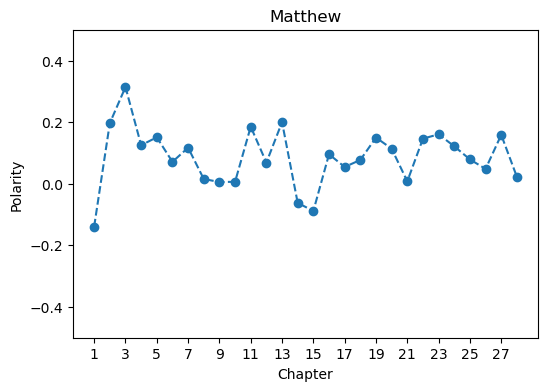

In [11]:
# Show the plot for one book
import numpy as np
plt.figure(figsize=(6,4))
n_chap = len(polarity_in_book[0])
plt.plot(np.arange(1, n_chap+1), polarity_in_book[0], 'o--')
plt.xticks(np.arange(1, n_chap+1, 2))
plt.xlabel('Chapter')
plt.ylabel('Polarity')
plt.title(data.index[0])
plt.ylim(bottom=-0.5, top=0.5)
plt.show()

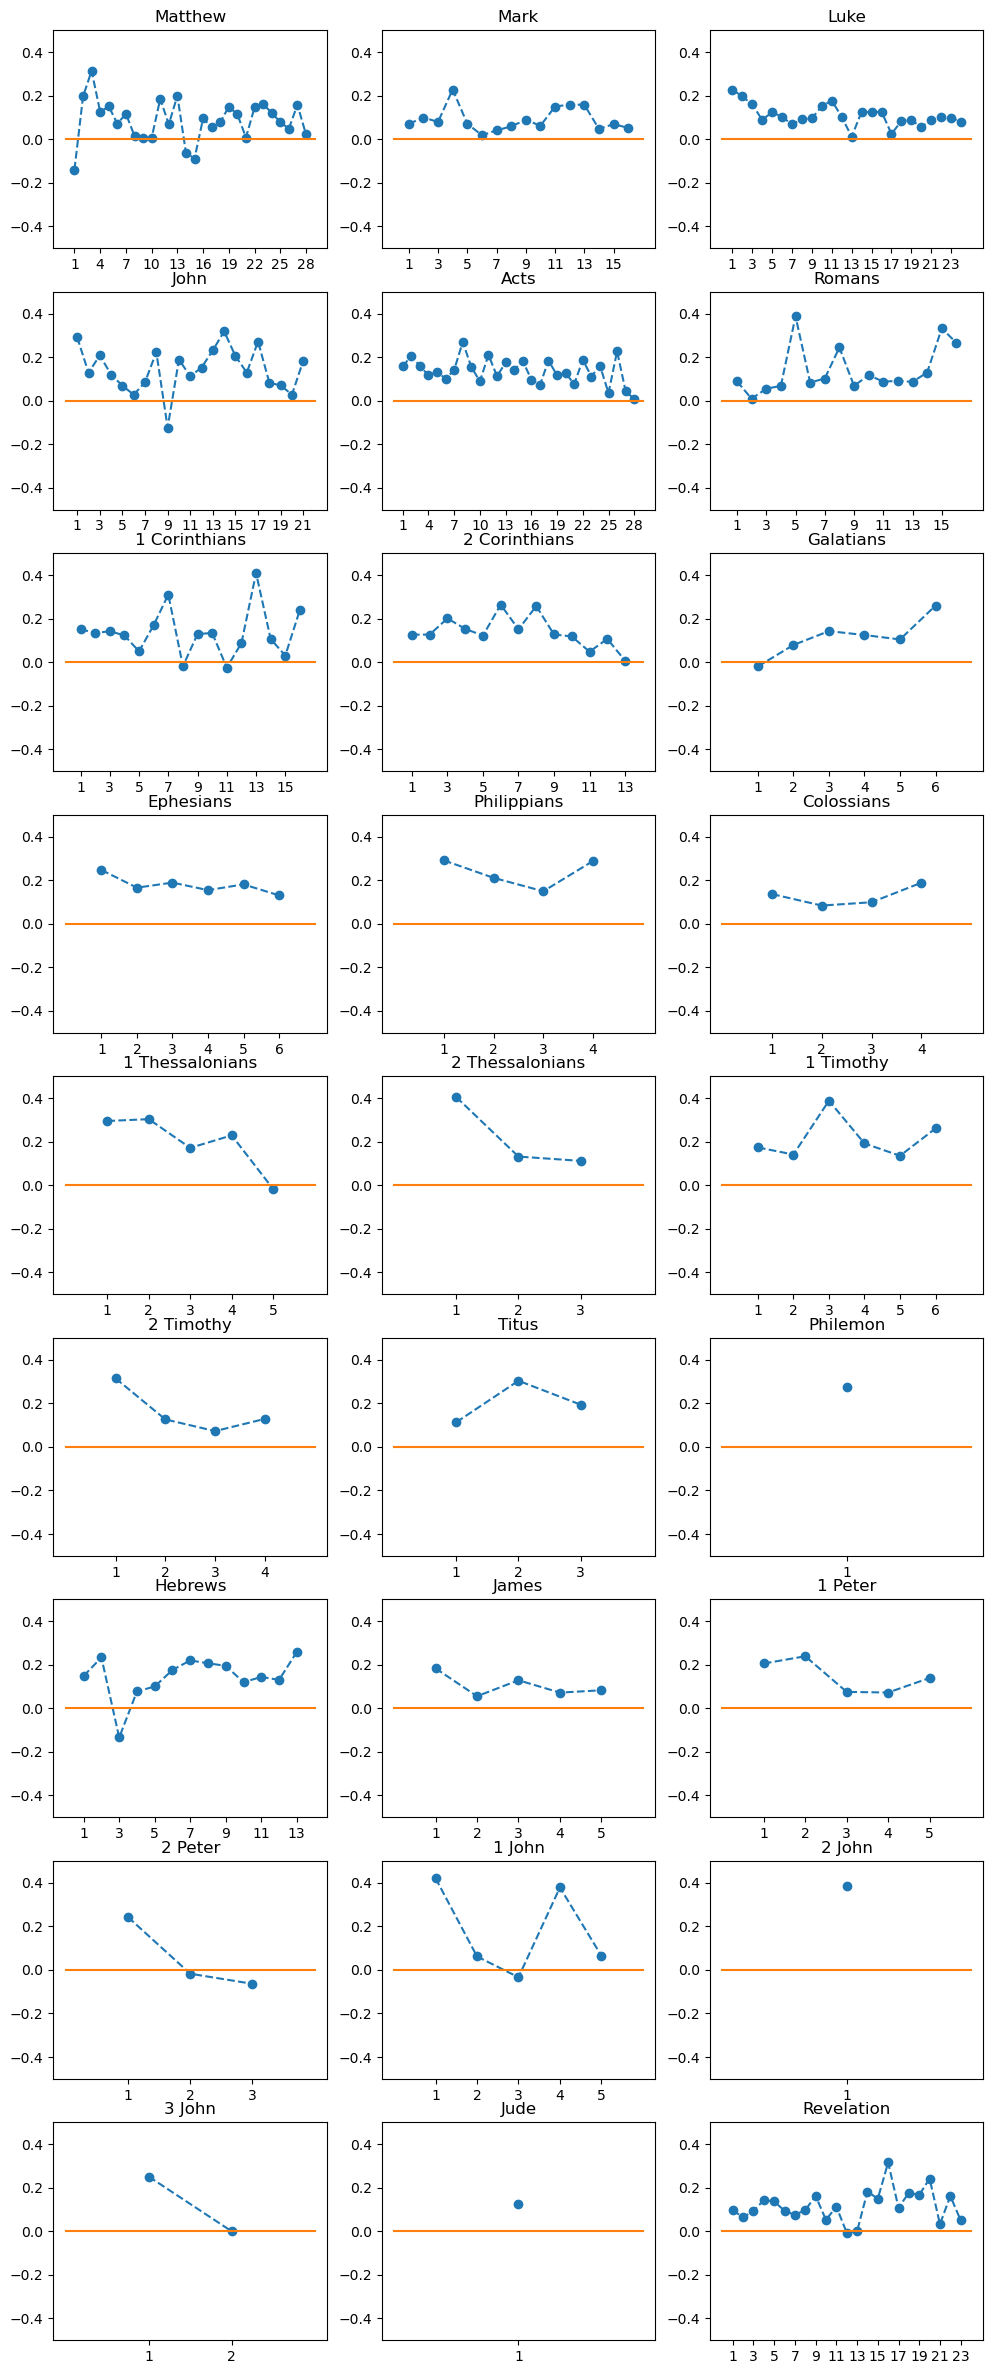

In [12]:
# Show the plots for all books
plt.rcParams['figure.figsize'] = [12, 30]

for index, book in enumerate(data.index):
    plt.subplot(9, 3, index+1)
    n = len(polarity_in_book[index])
    plt.plot(np.arange(1,n+1), polarity_in_book[index], 'o--')
    plt.xticks(np.arange(1, n+1, 1+n//13))
    plt.plot(np.arange(0,n+2), np.zeros(n+2))
    #plt.xlabel('Chapter Segment')
    #plt.ylabel('Polarity')
    plt.title(book)
    plt.ylim(bottom=-.5, top=0.5)

plt.show()

Observations?

## Additional Exercises

1. Modify the number of sections the book is split into and see how the charts change.